In [1]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#
from pathlib import Path

import cv2
import tensorflow as tf



print(tf.config.list_physical_devices('GPU'))

print("Tensorflow version: ", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tensorflow version:  2.1.0


In [2]:
samples_classified_directory = Path("samples_classified")

In [3]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=5,verbose=0):
    """
    Trains a conv net for the flowers dataset with a 5-class classifiction output
    Also provides suitable arguments for extending it to other similar apps

    Arguments:
            train_directory: The directory where the training images are stored in separate folders.
                            These folders should be named as per the classes.
            target_size: Target size for the training images. A tuple e.g. (200,200)
            classes: A Python list with the classes
            batch_size: Batch size for training
            num_epochs: Number of epochs for training
            num_classes: Number of output classes to consider
            verbose: Verbosity level of the training, passed on to the `fit_generator` method
    Returns:
            A trained conv net model

    """
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop

    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

    input_shape = tuple(list(target_size)+[3])

    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

    # Total sample count
    total_sample=train_generator.n

    # Training
    model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=num_epochs,
        verbose=verbose)

    return model

def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=5,verbose=0):
    """
    Trains a conv net for the flowers dataset with a 5-class classifiction output
    Also provides suitable arguments for extending it to other similar apps

    Arguments:
            train_directory: The directory where the training images are stored in separate folders.
                            These folders should be named as per the classes.
            target_size: Target size for the training images. A tuple e.g. (200,200)
            classes: A Python list with the classes
            batch_size: Batch size for training
            num_epochs: Number of epochs for training
            num_classes: Number of output classes to consider
            verbose: Verbosity level of the training, passed on to the `fit_generator` method
    Returns:
            A trained conv net model

    """
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop

    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

    input_shape = tuple(list(target_size)+[3])

    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

    # Total sample count
    total_sample=train_generator.n

    # Training
    model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=num_epochs,
        verbose=verbose)

    return model

In [4]:
classes = [
        'ready',
        'mario_score',
        'radracer_score',
        'tetris_score',
        'final_score',
    ]

model = train_CNN(
    samples_classified_directory,
    (224, 256),
    classes=classes,
    verbose=True,
)

Found 55 images belonging to 5 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1 steps
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.5551 - acc: 0.3273
Epoch 2/20
1/1 [==============================] - 0s 173ms/step - loss: 3.0147 - acc: 0.7091
Epoch 3/20
1/1 [==============================] - 0s 174ms/step - loss: 1.5126 - acc: 0.4545
Epoch 4/20
1/1 [==============================] - 0s 174ms/step - loss: 1.2739 - acc: 0.6364
Epoch 5/20
1/1 [==============================] - 0s 171ms/step - loss: 1.2728 - acc: 0.6727
Epoch 6/20
1/1 [==============================] - 0s 172ms/step - loss: 1.5776 - acc: 0.2909
Epoch 7/20
1/1 [==============================] - 0s 177ms/step - loss: 1.2919 - acc: 0.4909
Epoch 8/20
1/1 [==============================] - 0s 177ms/step - loss: 0.9095 - acc: 0.8545
Epoch 9/20
1/1 [==============================] - 0s 172ms/step - loss: 0.6968 - acc: 0.7091
Epoch 1

tetris score

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


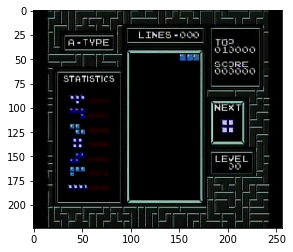

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img_tetris_yt = mpimg.imread("samples/snap_50520_yt.png")

img_tetris_yt_resize = cv2.resize(img_tetris_yt, dsize=(256, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_tetris_yt_resize)
plt.show()

In [6]:
img_tetris_yt_cup=np.expand_dims(img_tetris_yt_resize,axis=0)
model.predict(img_tetris_yt_cup)

array([[3.5789439e-05, 1.6520910e-04, 3.5237637e-05, 9.9959880e-01,
        1.6493772e-04]], dtype=float32)

mario score

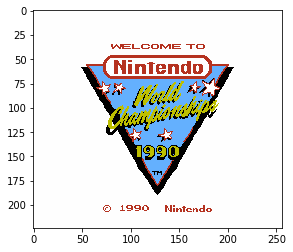

[[0.85561806 0.06164003 0.014697   0.00556574 0.06247919]]


In [7]:
img_mario_yt = mpimg.imread("samples/snap_120.png")

img_mario_yt_resize = cv2.resize(img_mario_yt, dsize=(256, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_mario_yt_resize)
plt.show()

img_mario_yt_cup=np.expand_dims(img_mario_yt_resize,axis=0)
print(model.predict(img_mario_yt_cup))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


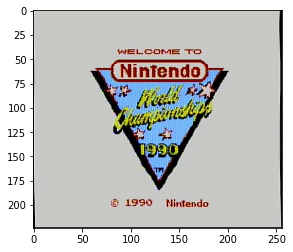

[[0.74333775 0.14283507 0.03055603 0.01027264 0.07299848]]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: class_ml\assets


In [8]:
# how about the yt one

img_mario_yt = mpimg.imread("samples/snap_40250_yt.png")

img_mario_yt_resize = cv2.resize(img_mario_yt, dsize=(256, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_mario_yt_resize)
plt.show()

img_mario_yt_cup=np.expand_dims(img_mario_yt_resize,axis=0)
print(model.predict(img_mario_yt_cup))

model.save('class_ml')